In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv("cell2celltrain.csv")
test = pd.read_csv("cell2cellholdout.csv")

In [5]:
print("Numner of Columns in the Dataset are : ", train.shape[1])
print("\nNumner of Columns in the Dataset are : ", train.shape[0])

Numner of Columns in the Dataset are :  58

Numner of Columns in the Dataset are :  51047


In [6]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


#### Examining the Chrun Column of the Traning Dataset

In [7]:
train['Churn']

0        Yes
1        Yes
2         No
3         No
4        Yes
        ... 
51042    Yes
51043     No
51044    Yes
51045     No
51046     No
Name: Churn, Length: 51047, dtype: object

## EDA

In [8]:
churn_df=train[train['Churn']=='Yes']
non_churn_df= train[train['Churn']=='No']

In [9]:
churned= train[train['Churn']=='Yes'].shape[0]

In [10]:
notchurned= train[train['Churn']=='No'].shape[0]

In [11]:
print("Total Churned customer {} ".format(notchurned))

Total Churned customer 36336 


In [12]:
#Do all imports
import pandas as pd
from matplotlib import pyplot as plt

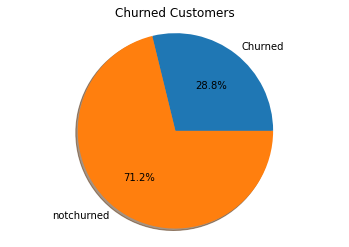

In [13]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([14711, 36336 ])
mylabels = ["Churned", "notchurned"]


def func(pct):
  return "{:1.1f}%".format(pct)
 
plt.pie(y, labels=mylabels, autopct=lambda pct: func(pct), shadow=True)
plt.title('Churned Customers')
plt.axis('equal')
plt.show()

In [14]:
train['MonthlyRevenue'].isnull().sum()

156

In [15]:
total_monthly_rev=train['MonthlyRevenue'].sum()
total_churned_rev=churn_df['MonthlyRevenue'].sum()
total_nonchrun_rev=non_churn_df['MonthlyRevenue'].sum()

In [16]:
print(total_monthly_rev,total_churned_rev,total_nonchrun_rev)

2994146.1500000004 849105.3899999999 2145040.76


In [17]:
non_churn_df['MonthlyRevenue'].fillna(non_churn_df['MonthlyRevenue'].mean(),inplace=True)

C:\Users\rdrl\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
churn_df['MonthlyRevenue'].fillna(churn_df['MonthlyRevenue'].mean(),inplace=True)


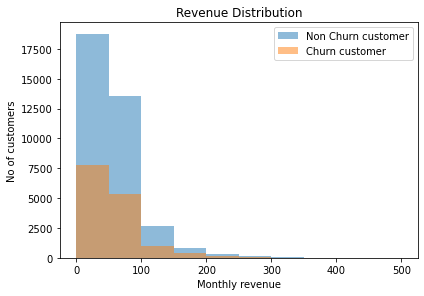

In [19]:
plt.hist(non_churn_df['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350,400,450,500],alpha=0.5, label='Non Churn customer')
plt.hist(churn_df['MonthlyRevenue'],bins=[0,50,100,150,200,250,300,350,400,450,500],alpha=0.5,label='Churn customer')
plt.ylabel("No of customers")
plt.xlabel("Monthly revenue")
plt.legend()
plt.tight_layout()
plt.title('Revenue Distribution')
plt.show()

#### Encoding Values in Churn Column for easy computation : Yes:1 , No:0

In [20]:
#Churn : Yes:1 , No:0
Churn = {'Yes': 1,'No': 0} 
  
train.Churn = [Churn[item] for item in train.Churn] 

In [21]:
train['Churn']

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51047, dtype: int64

In [22]:
Missing_cloumns = train.columns[train.isnull().any()]
print("Total no. of Columns with Missing/NA Values : ", len(Missing_cloumns))
print("\nName of the Columns with Missing Values : ")
for i in Missing_cloumns:
      print(i)

Total no. of Columns with Missing/NA Values :  14

Name of the Columns with Missing Values : 
MonthlyRevenue
MonthlyMinutes
TotalRecurringCharge
DirectorAssistedCalls
OverageMinutes
RoamingCalls
PercChangeMinutes
PercChangeRevenues
ServiceArea
Handsets
HandsetModels
CurrentEquipmentDays
AgeHH1
AgeHH2


In [23]:
#Replacing the NULL/Missing Values with 0
train.replace(np.nan, 0, inplace=True)

In [24]:
#Checking if there's any missing value left in the dataset
Missing_cloumns = train.columns[train.isnull().any()]
print("Total no. of Columns with Missing/NA Values : ", len(Missing_cloumns))
print("\nName of the Columns with Missing Values : ")
for i in Missing_cloumns:
      print(i)

Total no. of Columns with Missing/NA Values :  0

Name of the Columns with Missing Values : 


In [25]:
print("\nDatatypes of the Columns")
print('--------------------------------')
print("\nColumns with 'int' datatype : ")
for i in list(train.select_dtypes(include=['int64']).columns):
    print(i)

print('\n--------------------------------')
print("Columns with 'float' datatype : ")
for f in list(train.select_dtypes(include=['float64']).columns):
    print(f)

print('\n--------------------------------')
print("Columns with 'String' datatype : ")
for s in list(train.select_dtypes(include=['object']).columns):
    print(s)


Datatypes of the Columns
--------------------------------

Columns with 'int' datatype : 
CustomerID
Churn
MonthsInService
UniqueSubs
ActiveSubs
RetentionCalls
RetentionOffersAccepted
ReferralsMadeBySubscriber
IncomeGroup
AdjustmentsToCreditRating

--------------------------------
Columns with 'float' datatype : 
MonthlyRevenue
MonthlyMinutes
TotalRecurringCharge
DirectorAssistedCalls
OverageMinutes
RoamingCalls
PercChangeMinutes
PercChangeRevenues
DroppedCalls
BlockedCalls
UnansweredCalls
CustomerCareCalls
ThreewayCalls
ReceivedCalls
OutboundCalls
InboundCalls
PeakCallsInOut
OffPeakCallsInOut
DroppedBlockedCalls
CallForwardingCalls
CallWaitingCalls
Handsets
HandsetModels
CurrentEquipmentDays
AgeHH1
AgeHH2

--------------------------------
Columns with 'String' datatype : 
ServiceArea
ChildrenInHH
HandsetRefurbished
HandsetWebCapable
TruckOwner
RVOwner
Homeownership
BuysViaMailOrder
RespondsToMailOffers
OptOutMailings
NonUSTravel
OwnsComputer
HasCreditCard
NewCellphoneUser
NotNewCellp

#### Encoding the String variables

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def Encoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [27]:
train = Encoder(train)
print("Successfully Encoded the String Columns in Traning data")

Successfully Encoded the String Columns in Traning data


In [28]:
test = Encoder(test)
print("Successfully Encoded the String Columns in Test data")

Successfully Encoded the String Columns in Test data


In [29]:
test = test.drop(columns=['Churn'],axis=1)
print(test.shape)

(20000, 57)


In [30]:
# Checking the Frequency distribution of Churn Column in Training data"
train_chrn = pd.crosstab(index=train["Churn"], columns="count")      
train_chrn

col_0,count
Churn,
0,36336
1,14711


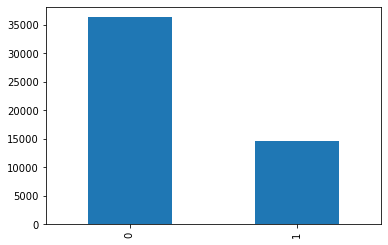

In [31]:
# Distribution of Churn
train.Churn.value_counts()[0:30].plot(kind='bar')
plt.show()

## Splitting Data

In [32]:
from sklearn.model_selection import train_test_split
Y = train['Churn']
X = train.drop(columns=['Churn'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=8)

In [33]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (35732, 57)
Y train shape:  (35732,)
X test shape:  (15315, 57)
Y test shape:  (15315,)


## Machine Learning Models

## Random Forest Classifier

### First Iteration of the Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
RF_1 = RandomForestClassifier()
RF_1.fit(X_train, Y_train)

Training score = 1.0
Test score = 0.7194253999347046


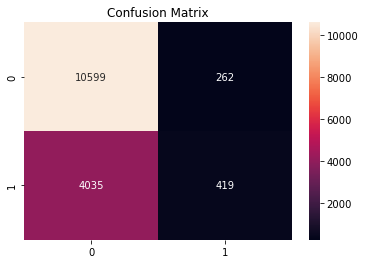

In [165]:
from sklearn.metrics import confusion_matrix
ypred = RF_1.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [166]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.7194253999347046
Precision = 0.6152716593245228
Recall = 0.0940727436012573
F1 Score = 0.1631937682570594


ROC AUC = 0.6627403462630843


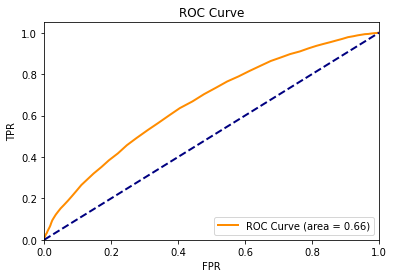

In [169]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF_1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Second Iteration of the Random Forest

In [170]:
RF_2 = RandomForestClassifier(n_estimators=150,random_state=8,n_jobs=-1)
RF_2.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=150, n_jobs=-1, random_state=8)

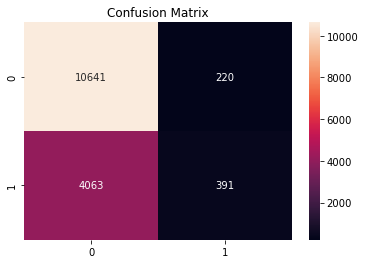

In [171]:
from sklearn.metrics import confusion_matrix
ypred = RF_2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [172]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.72033953640222
Precision = 0.6399345335515548
Recall = 0.08778625954198473
F1 Score = 0.15439289239881537


ROC AUC = 0.6685083485660971


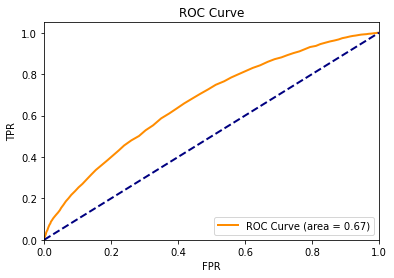

In [173]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF_2.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Naive bayes classification

In [174]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nb = GaussianNB()

# We train model
nb.fit(X_train, Y_train)

GaussianNB()

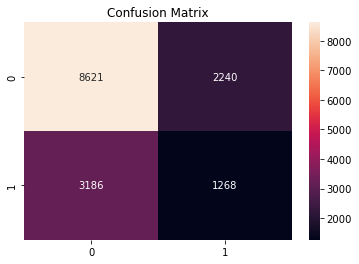

In [175]:
from sklearn.metrics import confusion_matrix
ypred = nb.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [176]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.6457068233757753
Precision = 0.3614595210946408
Recall = 0.2846879209699147
F1 Score = 0.31851293644812867


ROC AUC = 0.5699640396111255


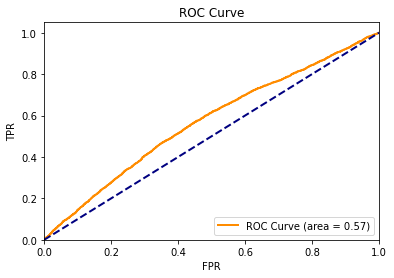

In [177]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = nb.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Gradient Boosting 

### First Iteration of the Gradient Boosting

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()

# We train model
gbm_model.fit(X_train, Y_train)

GradientBoostingClassifier()

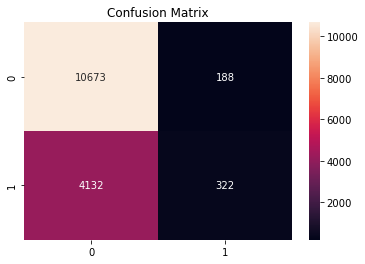

In [179]:
from sklearn.metrics import confusion_matrix
ypred = gbm_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [180]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.7179236043095005
Precision = 0.6313725490196078
Recall = 0.07229456668163449
F1 Score = 0.12973408541498793


ROC AUC = 0.6766064334942005


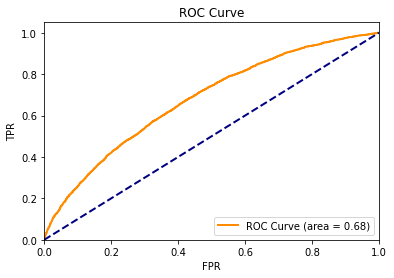

In [181]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = gbm_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Second Iteration of the Gradient Boosting

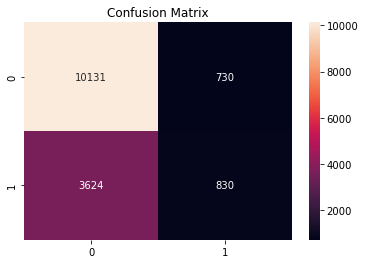

In [207]:
#Second Ieration

from sklearn.ensemble import GradientBoostingClassifier
gbm_model2 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=8, random_state=10)

# We train model
gbm_model2.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix
ypred = gbm_model2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


In [208]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.7157035586026771
Precision = 0.532051282051282
Recall = 0.1863493488998653
F1 Score = 0.2760226139008979


ROC AUC = 0.6676605224189225


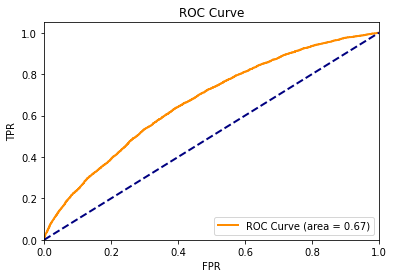

In [220]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = gbm_model2.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## LightGBM

In [182]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier()

# We train model
lgbm_model.fit(X_train, Y_train)

LGBMClassifier()

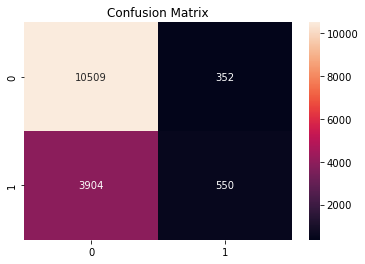

In [183]:
from sklearn.metrics import confusion_matrix
ypred = lgbm_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [184]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.7221025138752857
Precision = 0.6097560975609756
Recall = 0.12348450830713965
F1 Score = 0.20537714712471997


ROC AUC = 0.6819125019684797


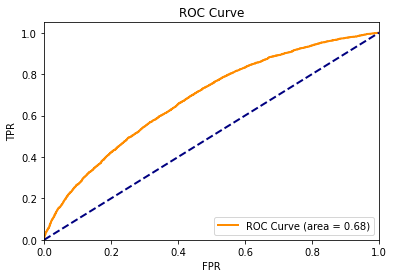

In [185]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = lgbm_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## KNN

In [186]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

# We train model
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

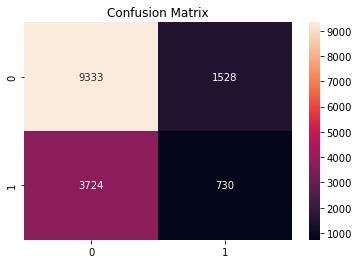

In [187]:
from sklearn.metrics import confusion_matrix
ypred = knn_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [188]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.6570682337577538
Precision = 0.3232949512843224
Recall = 0.163897620116749
F1 Score = 0.21752085816448152


ROC AUC = 0.5259917985556724


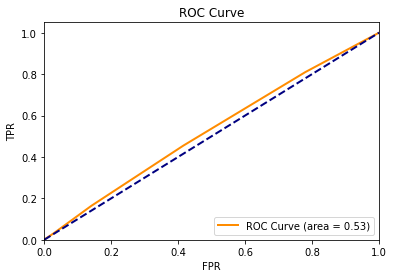

In [189]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = knn_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree

### First Iteration of the Decision Tree 

In [190]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

# We train model
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

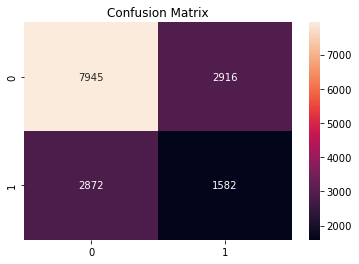

In [191]:
from sklearn.metrics import confusion_matrix
ypred = dt_model.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [192]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.6220698661443029
Precision = 0.35171187194308584
Recall = 0.35518634934889987
F1 Score = 0.3534405719392315


ROC AUC = 0.5433513921498205


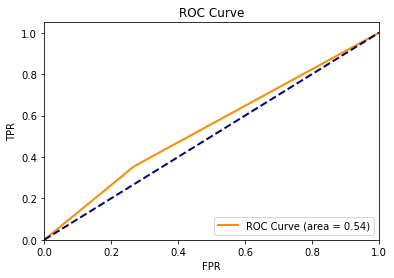

In [219]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = dt_model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Second Iteration of the Decision Tree

In [215]:
#Second Iteration

from sklearn.tree import DecisionTreeClassifier

dt_model2 = DecisionTreeClassifier(max_depth = 8, random_state = 42)

# We train model
dt_model2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

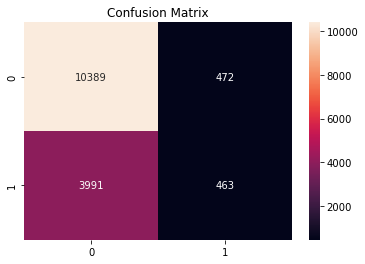

In [216]:
from sklearn.metrics import confusion_matrix
ypred = dt_model2.predict(X_test)
cm = confusion_matrix(Y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [217]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.7085863532484492
Precision = 0.49518716577540106
Recall = 0.10395150426582847
F1 Score = 0.17183150862868807


ROC AUC = 0.6349773396919485


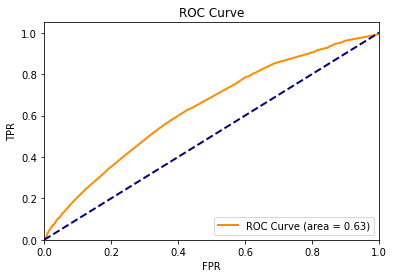

In [218]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = dt_model2.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(Y_test,ypred[:,1])
roc_auc = roc_auc_score(Y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()